In [1]:
import warnings
warnings.filterwarnings('ignore') #library to handle warnings without interrupting the program

In [2]:
import numpy as np               #To handle arrays
import pandas as pd              #To handle dataframes and their operations

#To handle data visualisation
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("paper", font_scale=1.5, rc={"font_size":16,"axes.titlesize":16,"axes.labelsize":16})

%matplotlib inline 

In [3]:
#For hypothesis testing
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from statsmodels.stats.weightstats import CompareMeans
from statsmodels.stats.proportion import proportions_ztest



In [4]:
#Packages mainly for Anova
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi



In [5]:
data=pd.read_csv('CardioGoodFitness.csv') # Importing dataset 

In [6]:
data.shape # Define shape of the data

(180, 9)

The imported dataset originally has 180 rows and 9 columns

In [7]:
data.head() # To view some part of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [8]:
data.info()  # Information about the data including data type, rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


six (6) of the features are of integer data type (age, education, usage, fitness, income, and miles), while the remaining three are of object data type (product, gender, and marital status)

# Let's define a function to check for missing data

In [9]:
def missing_data_check(df):
    total = df.isnull().sum().sort_values(ascending=False)                              # total number of null values
    grand_total=df.isnull().count().sort_values(ascending=False)                        # total number of data entry
    percent = (total*100/grand_total)                                                   # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])       # putting the above two together
    return missing_data                                                                 # return the dataframe
missing_data_check(data)

,Total,Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0
Usage,0,0.0
Fitness,0,0.0
Income,0,0.0
Miles,0,0.0


So, no missing data in the dataset (or data fields)

In [10]:
data.describe() # check distribution of the numeric data fields

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Mean age, education, usage, fitness, income, and miles are approximately 29 years, 16 years, 3.5, 3.3, £53720, and 103 miles respectively. Their corresponding median values are 26 years, 16 years, 3, 3, £50600 and 94 miles. The mean education corresponds to the median - showing a possibility of normal distribution. Also, other features may show normal distribution, but to confirm normality, let's use further data visualisation tools.

# Univariate Data Analysis

Hypothesis
Ho: The data field is normally distributed
H1: The data field is not normally distributed

In [11]:
normaltest(data['Age'])

NormaltestResult(statistic=24.013245406896093, pvalue=6.103655503221668e-06)

Since p-value < 0.05, we reject the null hypothesis for Age. So, ages of the customers are not normally distributed.

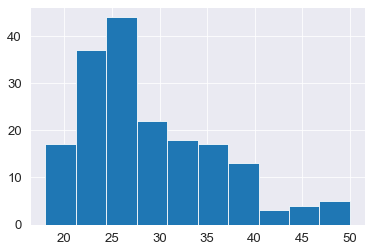

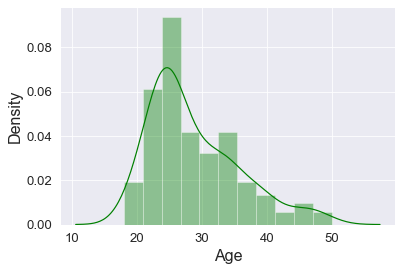

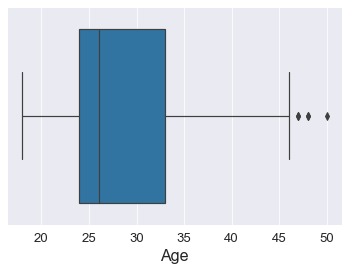

In [12]:
plt.hist(data.Age)
plt.show()
sns.distplot(data['Age'],color='g')
plt.show()
sns.boxplot(x='Age',data=data)
plt.show()

Age is not normally distributed, but instead skewed towards the right.
Over 75% of the customers have ages below 33 years. Ages above 46 years are merely outliers. 

In [13]:
normaltest(data['Education'])

NormaltestResult(statistic=15.65315956322462, pvalue=0.0003989877746126755)

Since p-value < 0.05, we reject the null hypothesis on Education. So, education of the customers are not normally distributed.

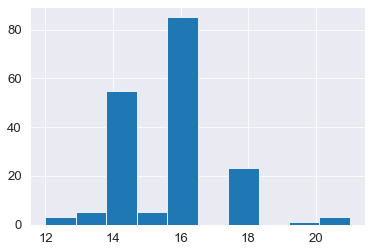

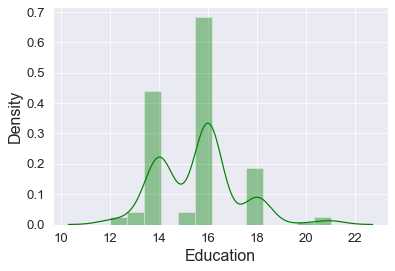

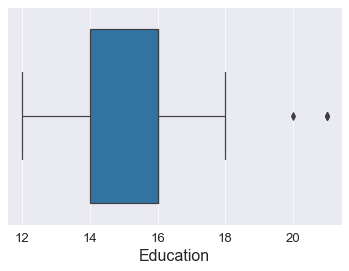

In [14]:
plt.hist(data.Education)
plt.show()
sns.distplot(data['Education'],color='g')
plt.show()
sns.boxplot(x='Education',data=data)
plt.show()

Education is not normally distributed, but the distribution of relevant part of the data is quite symmetric. Education levels above 18 years are merely outliers. 

In [15]:
normaltest(data['Usage'])

NormaltestResult(statistic=16.360208150182817, pvalue=0.0002801727796036487)

Since p-value < 0.05, we reject the null hypothesis on Usage. So, usage of treadmill by customers is not normally distributed.

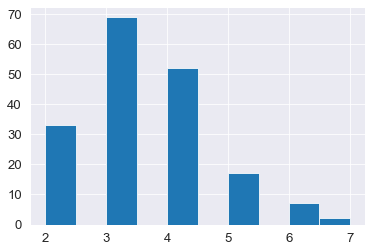

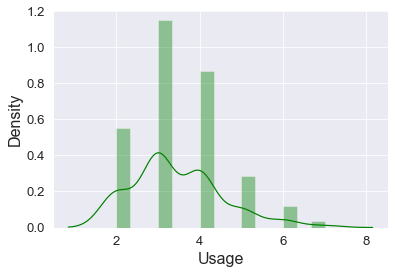

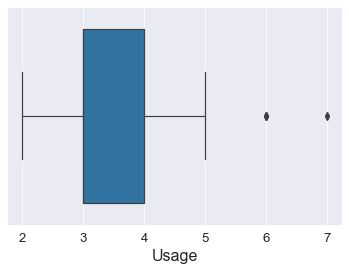

In [16]:
plt.hist(data.Usage)
plt.show()
sns.distplot(data['Usage'],color='g')
plt.show()
sns.boxplot(x='Usage',data=data)
plt.show()

Usage is not normally distributed, but the distribution of relevant part of the data is quite symmetric. 
Usage above 5 times per week are merely outliers. 

In [17]:
normaltest(data['Fitness'])

NormaltestResult(statistic=7.316631064402506, pvalue=0.02577589484305985)

Since p-value < 0.05, we reject the null hypothesis on Fitness. So, fitness of the customers is not normally distributed.

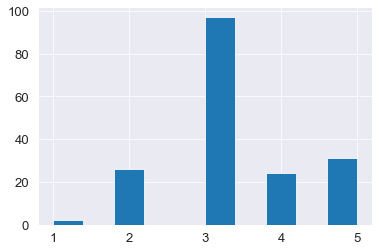

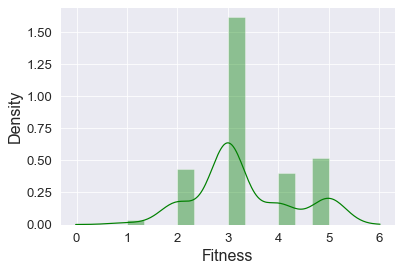

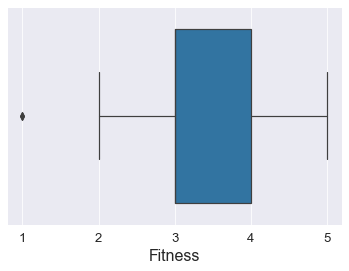

In [18]:
plt.hist(data.Fitness)
plt.show()
sns.distplot(data['Fitness'],color='g')
plt.show()
sns.boxplot(x='Fitness',data=data)
plt.show()

Fitness is not normally distributed, but the distribution of relevant part of the data is quite symmetric. 
Fitness below two (2) are merely outliers. 

In [19]:
normaltest(data['Income'])

NormaltestResult(statistic=41.16569129708731, pvalue=1.1507572321269166e-09)

Since p-value < 0.05, we reject the null hypothesis on Income. So, income of the customers are not normally distributed.

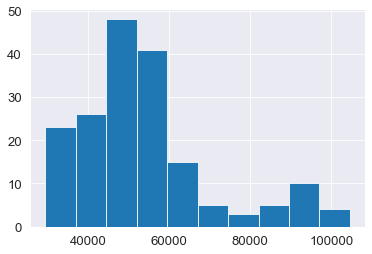

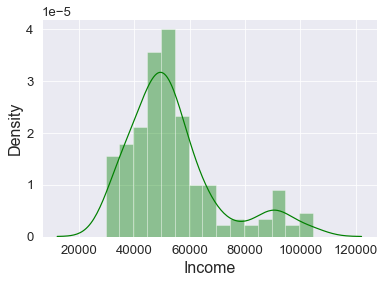

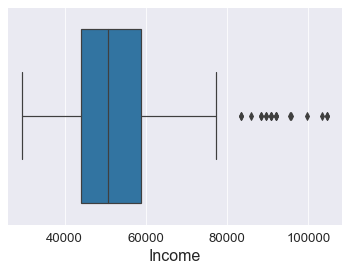

In [20]:
plt.hist(data.Income)
plt.show()
sns.distplot(data['Income'],color='g')
plt.show()
sns.boxplot(x='Income',data=data)
plt.show()

Income is not normally distributed, but instead skewed towards the right.
Over 75% of the customers' income is below £58668. Income over £78000 are merely outliers. 

In [21]:
normaltest(data['Miles'])

NormaltestResult(statistic=73.61857789249362, pvalue=1.032592408553557e-16)

Since p-value < 0.05, we reject the null hypothesis on Miles. So, miles covered by customers are not normally distributed.

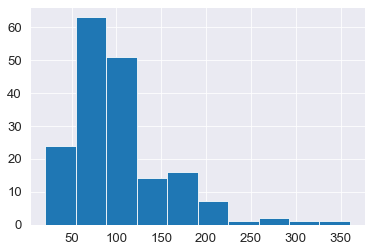

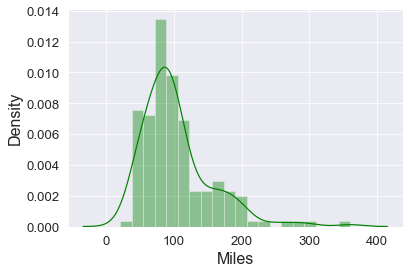

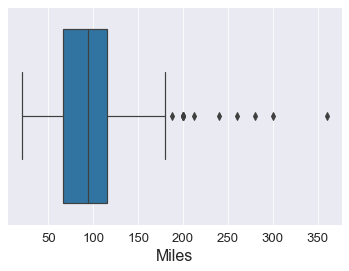

In [22]:
plt.hist(data.Miles)
plt.show()
sns.distplot(data['Miles'],color='g')
plt.show()
sns.boxplot(x='Miles',data=data)
plt.show()

Miles covered by customers are not normally distributed, but instead skewed towards the right.
Over 75% of miles covered by customers is below 125 miles. Miles over 180 (miles) are merely outliers and statistically 
irrelevant. 

# Univariate data analysis for categorical data

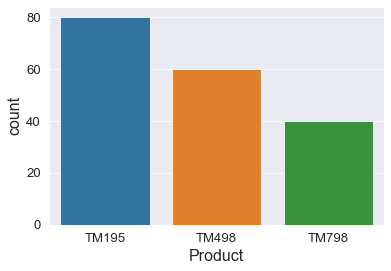

In [23]:
sns.countplot(data['Product'])
plt.show()

Most of the customers use TM195 (product), followed by TM498, and the least used product is TM798. In other words, 80 customers out of 180 use TM195, while 60 customers use TM498, and the remaining 40 customers use TM798.

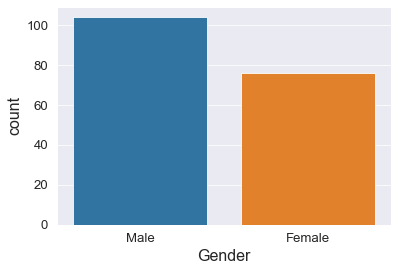

In [24]:
sns.countplot(data['Gender'])
plt.show()

Over 100 customers out of 180 are male, while the remaining customers are female.

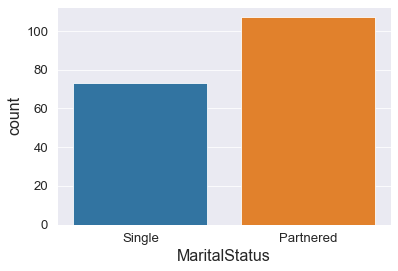

In [25]:
sns.countplot(data['MaritalStatus'])
plt.show()

Over 100 customers are have partners (or are married), while the remaining customers are single.

Based on univariate data analysis, none of the numeric features is normally distributed - majority of them are skewed (distributed) towards the right and full of outliers. Also, majority of the customers use TM195 product and least of TM798 product. Furthermore, most of the customers are male, and majority of the customers have at least a partner compared to the single ones.

To understand interaction between features in the dataset, let's conduct a multivariate data analysis.

# Multivariate Data Analysis

To avoid ambiguity in analysis, let's focus more on the relationship between age (or income) and usage (and fitness) as these features are more important in this analysis. Then we can ascertain whether age (or income) of customers affect their exercise product usage (and fitness). We can have a rough picture of the relationship between each of the features below.

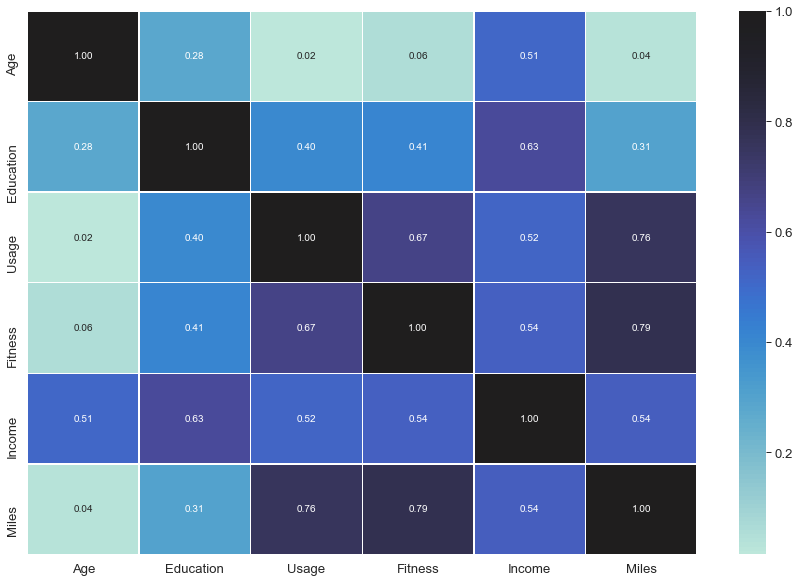

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f', center = 1 )  # heatmap
plt.show()

Let's use a benchmark correlation coefficient of 0.5.

The heatmap (correlation) shows that, there is no relationship between Age and (Education, Usage, Fitness, or Miles). 

However, there appears to be a slight positive relationship between Age and Income (0.51).

Furthermore, there is a positive relationship between Income and (Age, Education, Usage, Fitness or Miles)

There is a positive relationship between Fitness and (Usage, Income, or Miles)

There is a positive relationship between Usage and (Fitness, Income, or Miles)

There is a positive relationship between Education and Income (0.63). It appears that the higher the education level the more income a customer gets.

There is a positive relationship between Miles and (Usage, Fitness, or Income)

However, there is a more significant relationship between Miles and (Usage or Fitness). This shows that the higher the miles covered, the more fit a customer is (0.79). Moreover, the more miles covered depends on the amount of usage (0.76). Inferentially, the more usage of the treadmill, the higher a customer's level of finess (0.67). 

But, the positive relationship between Income and Usage (or Fitness) is not very significant (0.52-0.54). So, there is a chance that not all income range of customers impact usage (or fitness).

Also, even though there is no relationship between Age and Usage (Fitness), it's possible that some age range might impact usage (or fitness).

See the pairplot below for graphical representation of the correlations.

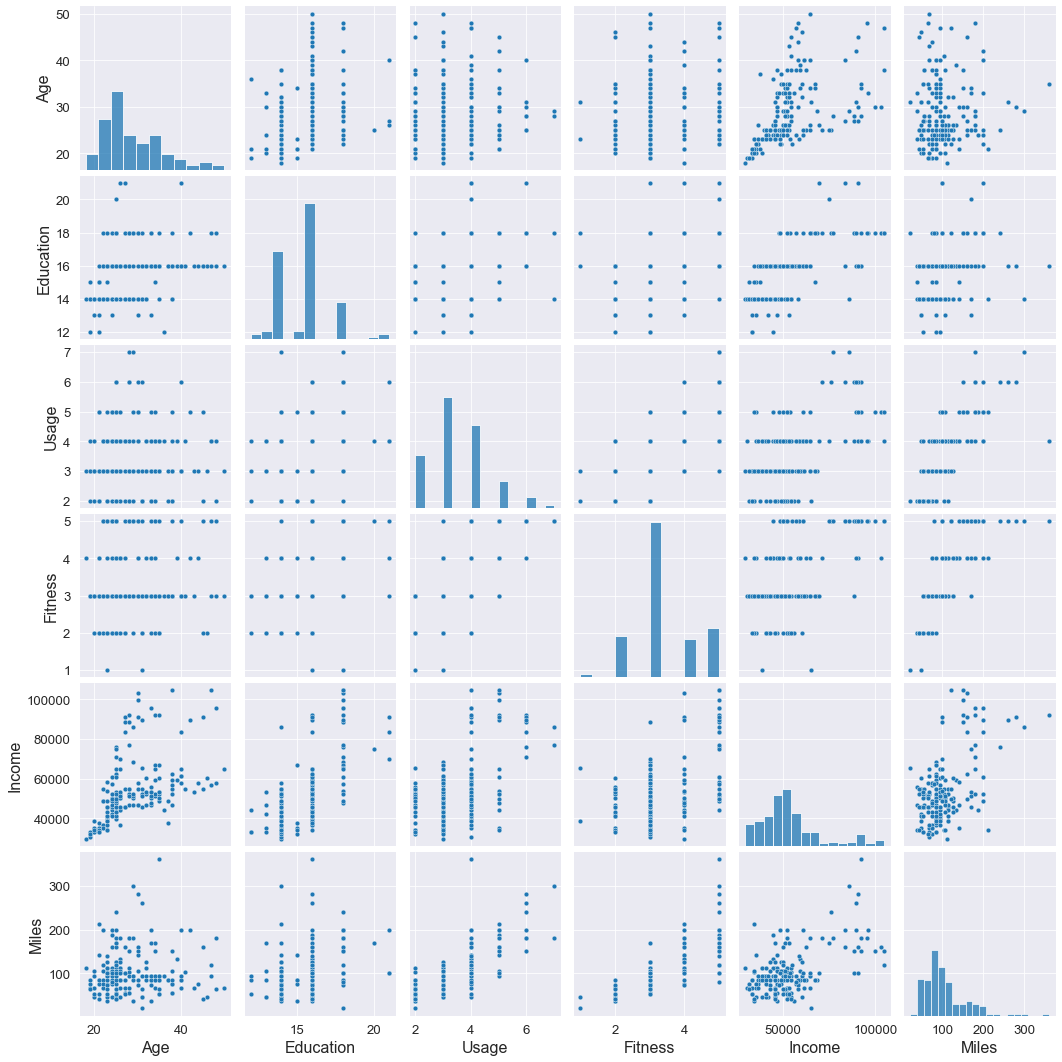

In [27]:
sns.pairplot(data)
plt.show()

Let's take the analysis further to get a clearer relationship.

In [28]:
data.groupby(by=['Usage'])['Miles'].mean()

Usage
2     58.545455
3     83.420290
4    118.942308
5    160.705882
6    212.857143
7    240.000000
Name: Miles, dtype: float64

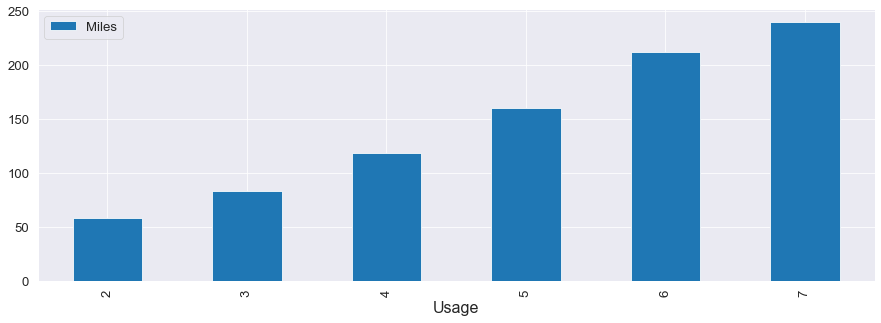

In [29]:
data.groupby(by=['Usage'])['Miles'].mean().reset_index().sort_values(['Miles']).plot(x='Usage',
                                                                                                           y='Miles',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

Miles covered increase with Usage

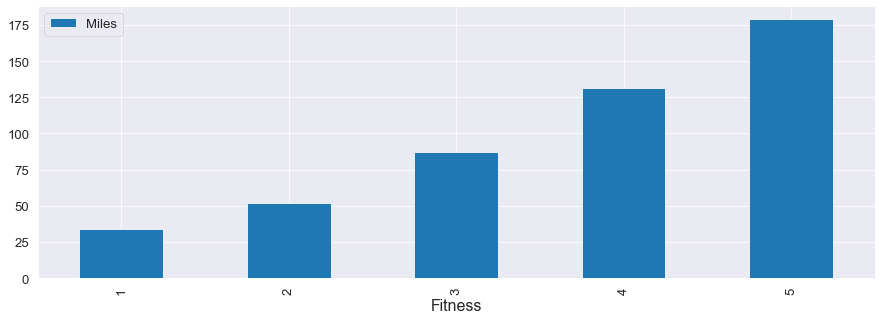

In [30]:
data.groupby(by=['Fitness'])['Miles'].mean().reset_index().sort_values(['Miles']).plot(x='Fitness',
                                                                                                           y='Miles',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

Fitness increases with amount of Miles covered.

In [31]:
data.groupby(by=['Usage'])['Fitness'].mean()

Usage
2    2.515152
3    3.000000
4    3.596154
5    4.411765
6    4.857143
7    5.000000
Name: Fitness, dtype: float64

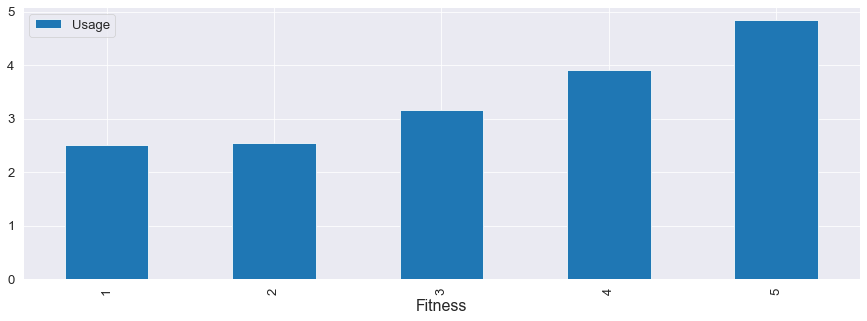

In [32]:
data.groupby(by=['Fitness'])['Usage'].mean().reset_index().sort_values(['Usage']).plot(x='Fitness',
                                                                                                           y='Usage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

Fitness increases with Usage.

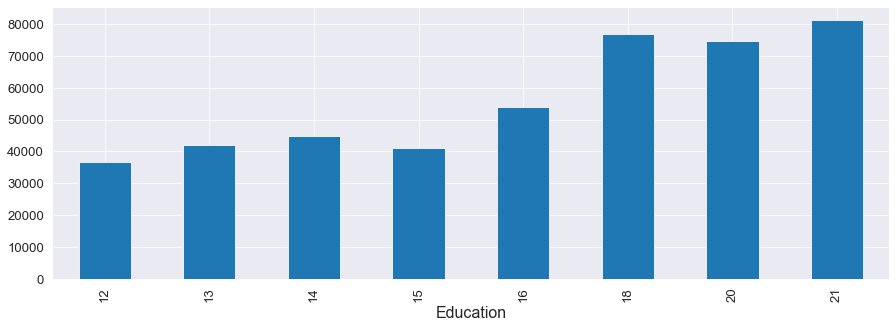

In [33]:
data.groupby(by=['Education'])['Income'].mean().plot(x='Education', y='Income', kind='bar', figsize=(15,5))
plt.show()

Generally, income of customers increases with their level of education. However, the trend was not sustained for mean education of 15 and 20 years. 

In [34]:
data.groupby(by=['Usage'])['Education'].mean()


Usage
2    14.939394
3    15.115942
4    15.942308
5    16.529412
6    17.857143
7    16.000000
Name: Education, dtype: float64

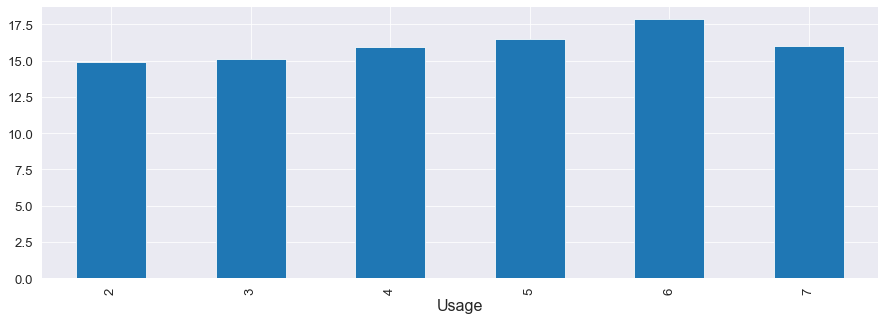

In [35]:
data.groupby(by=['Usage'])['Education'].mean().plot(x='Education', y='Usage', kind='bar', figsize=(15,5))
plt.show()

Customers whose period of education is 15 years, use the treadmill 2-3 times per week; while those with higher level of education uses the facility a bit more and increases as education (years) increases. However, the education of customers who use the treadmill 7 times per week is the same as those who use the facility 4 times per week. Thus, we can't really justify that education impacts usage of the treadmill. 

In [36]:
data.groupby(by=['Usage'])['Income'].mean()

Usage
2    46870.636364
3    47921.753623
4    56403.442308
5    66396.117647
6    84483.142857
7    81548.500000
Name: Income, dtype: float64

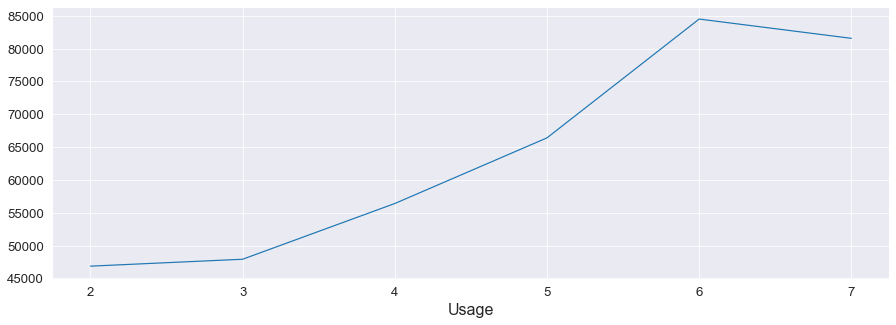

In [37]:
data.groupby(by=['Usage'])['Income'].mean().plot(x='Usage', y='Income', kind='line', figsize=(15,5))
plt.show()

In [38]:
data.groupby(by=['Usage'])['Age'].mean()


Usage
2    28.484848
3    28.985507
4    28.538462
5    29.058824
6    29.571429
7    28.500000
Name: Age, dtype: float64

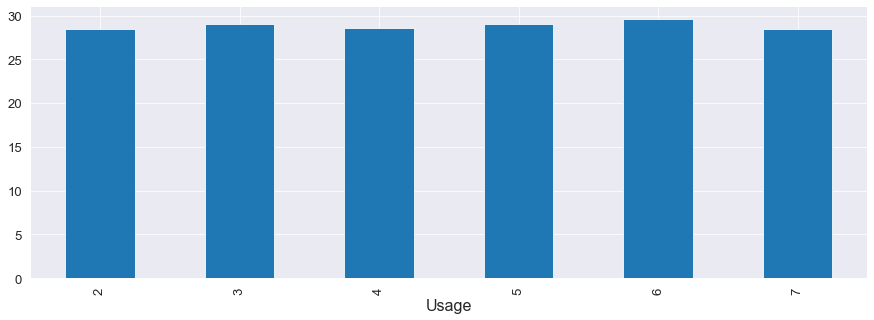

In [39]:
data.groupby(by=['Usage'])['Age'].mean().plot(x='Usage', y='Age', kind='bar', figsize=(15,5))
plt.show()

The above plot shows that age of a customer has nothing to do with their usage.

In [40]:
data.groupby(by=['Gender'])['Usage'].mean().sort_values(ascending=False)


Gender
Male      3.653846
Female    3.184211
Name: Usage, dtype: float64

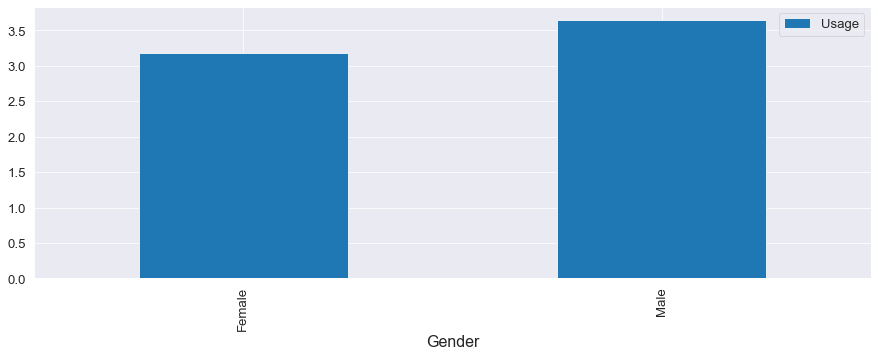

In [41]:
data.groupby(by=['Gender'])['Usage'].mean().reset_index().sort_values(['Usage']).plot(x='Gender',
                                                                                                           y='Usage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

Male customers use the treadmill more. However, this could be as a result of more male customers in the dataset.
So, further statistical testing might be required to justify the result.

In [42]:
data.groupby(by=['MaritalStatus'])['Usage'].mean().sort_values(ascending=False)


MaritalStatus
Single       3.465753
Partnered    3.448598
Name: Usage, dtype: float64

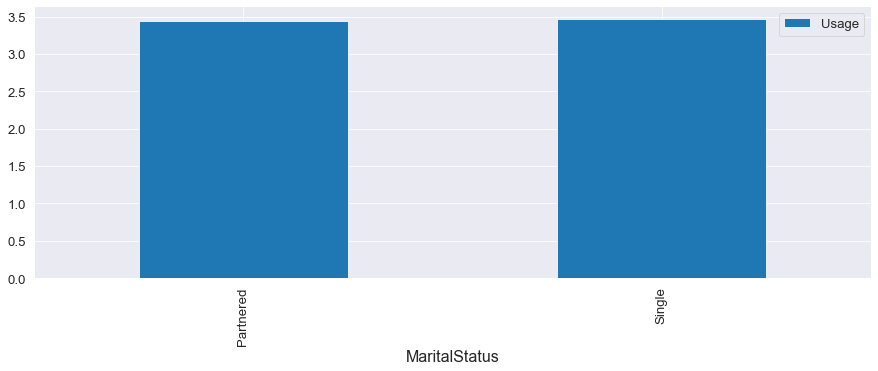

In [43]:
data.groupby(by=['MaritalStatus'])['Usage'].mean().reset_index().sort_values(['Usage']).plot(x='MaritalStatus',
                                                                                                           y='Usage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

In [44]:
data.groupby(by=['Product'])['Usage'].mean().sort_values(ascending=False)


Product
TM798    4.775000
TM195    3.087500
TM498    3.066667
Name: Usage, dtype: float64

People using TM798 product use the treadmill for almost 5 times per week, whereas other product users use the facility for about 3 times per week on the average. So, although least number of customers use product TM798, but those customers use the equipment nearly 5 times per week. 

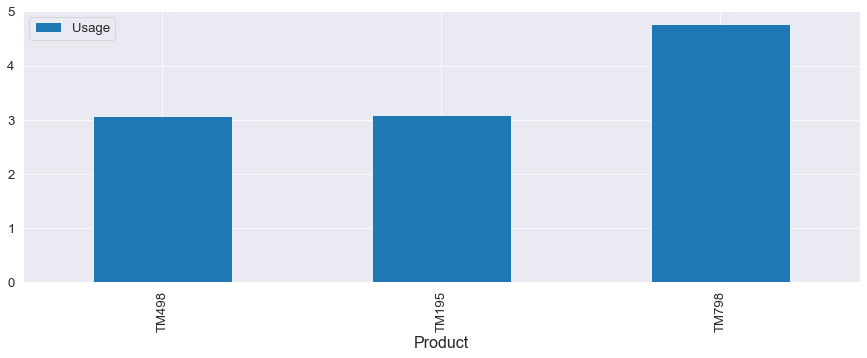

In [45]:
data.groupby(by=['Product'])['Usage'].mean().reset_index().sort_values(['Usage']).plot(x='Product',
                                                                                                           y='Usage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

Customers use TM798 nearly 5 times per week, while customers use other products about 3 times per week on the average.

Let's further analyse the relationship between Gender and Usage using ANOVA

Ho: There is no significant difference between mean usage of the different gender
H1: There is significant difference between mean usage of the different gender

In [46]:
data2=data.copy() # create a copy of the original data to avoid altering the original data
data2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [47]:
data_2=data2[['Gender', 'Usage']] # create a new dataframe from the copied data for ANOVA analysis
data_2.head()

,Gender,Usage
0,Male,3
1,Male,2
2,Female,4
3,Male,3
4,Male,4


In [48]:
model_2=smf.ols('Usage ~ C(Gender)', data=data_2).fit()
aov_table_2=anova_lm(model_2,typ=2)        #typ = 2 means no intercept, and typ=3 means include intercept on the anova table

In [49]:
print(aov_table_2)

               sum_sq     df         F    PR(>F)
C(Gender)    9.684930    1.0  8.578432  0.003847
Residual   200.959514  178.0       NaN       NaN


In [50]:
McGender=multi.MultiComparison(data_2['Usage'],data_2['Gender'])
results_Gender=McGender.tukeyhsd()

In [51]:
print(results_Gender.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
Female   Male   0.4696 0.0038 0.1532 0.7861   True
--------------------------------------------------


Since p-value < 0.05, we reject the null hypothesis. So, there is significant difference between mean usage for male and female.

In [52]:
data.groupby(by=['Gender'])['Usage'].mean().sort_values(ascending=False)


Gender
Male      3.653846
Female    3.184211
Name: Usage, dtype: float64

Therefore, male customers use the treadmill more than female customers. This is regardless of the fact that there are more male customers in the dataset. So, we have established that more male customers use the equipment more often, and that marital status of customers do not impact their usage of the facility. 

In [53]:
data2.groupby(by=['Gender'])['Fitness'].mean()


Gender
Female    3.026316
Male      3.519231
Name: Fitness, dtype: float64

Male customers are more fit as well.

Let's go back to our main focus of testing whether age (or income) of customers significantly impact their usage of the facility. Let's convert Income and Age into categorical data as shown below.

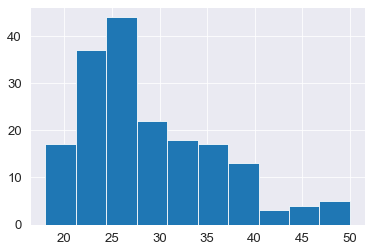

In [54]:
plt.hist(data.Age) # create histogram plot for age
plt.show()

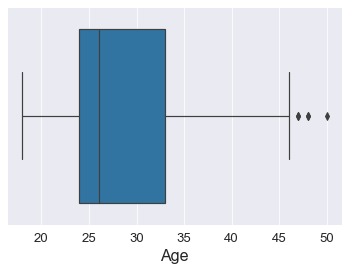

In [55]:
sns.boxplot(x='Age',data=data) # create boxplot for age to ascertain data distribution
plt.show()

From the above trend we can divide Age into '10-25 years','26-35 years','36-50 years'

In [56]:
#create a new column with name Age_Group
data2['Age_Group']=pd.cut(data2.Age, bins=(10,25,35,50),labels=('10-25 years','26-35 years','36-50 years'))

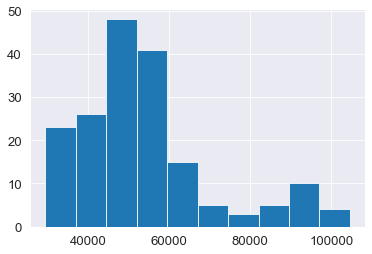

In [57]:
plt.hist(data.Income)
plt.show()

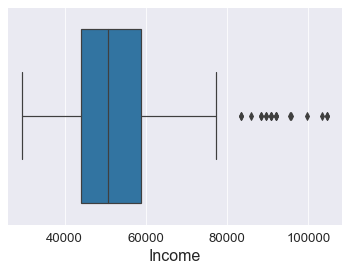

In [58]:
sns.boxplot(x='Income',data=data)
plt.show()

From the above trend we can divide Age into 'Less than £45,000','£45,000 -£60,000', 'Over £60,000'

In [59]:
#create a new column with name Income_Group
data2['Income_Group']=pd.cut(data2.Income, bins=(0,45000,60000,105000),labels=('Less than £45,000','£45,000 -£60,000',
                                                                               'Over £60,000'))

In [60]:
data2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Income_Group
0,TM195,18,Male,14,Single,3,4,29562,112,10-25 years,"Less than £45,000"
1,TM195,19,Male,15,Single,2,3,31836,75,10-25 years,"Less than £45,000"
2,TM195,19,Female,14,Partnered,4,3,30699,66,10-25 years,"Less than £45,000"
3,TM195,19,Male,12,Single,3,3,32973,85,10-25 years,"Less than £45,000"
4,TM195,20,Male,13,Partnered,4,2,35247,47,10-25 years,"Less than £45,000"


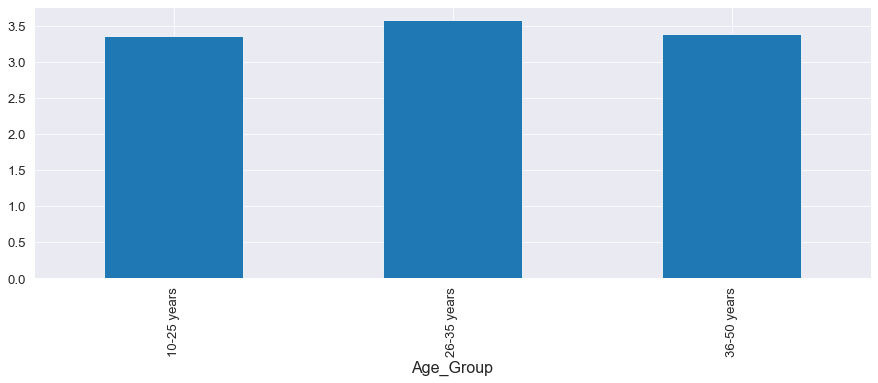

In [61]:
data2.groupby(by=['Age_Group'])['Usage'].mean().plot(x='Age_Group',
                                                                                                           y='Usage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

In [62]:
data2.groupby(by=['Age_Group'])['Usage'].mean()

Age_Group
10-25 years    3.354430
26-35 years    3.589041
36-50 years    3.392857
Name: Usage, dtype: float64

Mean usage for the different age groups are similar. So, further testing will be needed to justify whether or not the difference in mean usage is significant.

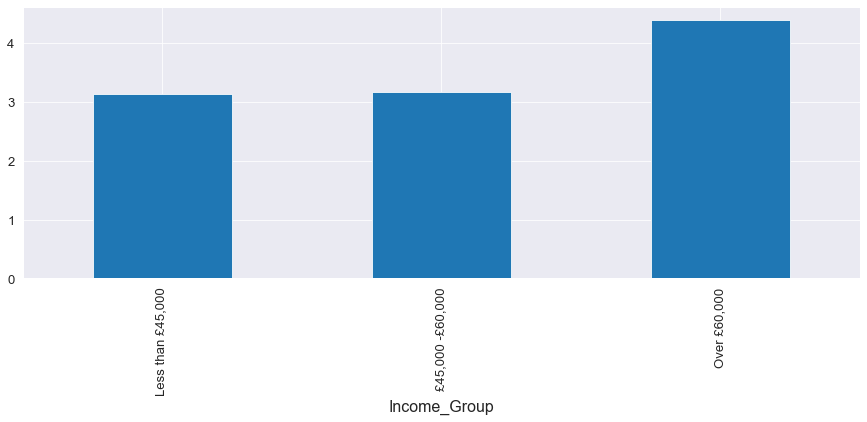

In [63]:
data2.groupby(by=['Income_Group'])['Usage'].mean().plot(x='Income_Group',y='Usage',kind='bar',figsize=(15,5))
plt.show()

In [64]:
data2.groupby(by=['Income_Group'])['Usage'].mean()


Income_Group
Less than £45,000    3.142857
£45,000 -£60,000     3.179775
Over £60,000         4.404762
Name: Usage, dtype: float64

Mean usage for the different income groups are similar, except for income groups over £60,000. So, further testing will be 
needed to justify whether or not the difference in mean usage is significant.

In [65]:
data3=data2[['Age_Group', 'Usage']]
data3.head()

,Age_Group,Usage
0,10-25 years,3
1,10-25 years,2
2,10-25 years,4
3,10-25 years,3
4,10-25 years,4


In [66]:
model3=smf.ols('Usage ~ C(Age_Group)', data=data3).fit()
aov_table3=anova_lm(model3,typ=2)        #typ = 2 means no intercept, and typ=3 means include intercept on the anova table

In [67]:
print(aov_table3)

                  sum_sq     df         F    PR(>F)
C(Age_Group)    2.218691    2.0  0.942082  0.391761
Residual      208.425754  177.0       NaN       NaN


In [68]:
McAgeGroup3=multi.MultiComparison(data3['Usage'],data3['Age_Group'])
results_AgeGroup3=McAgeGroup3.tukeyhsd()

In [69]:
print(results_AgeGroup3.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
10-25 years 26-35 years   0.2346 0.3808 -0.1818  0.651  False
10-25 years 36-50 years   0.0384    0.9 -0.5257 0.6026  False
26-35 years 36-50 years  -0.1962 0.6793 -0.7664  0.374  False
-------------------------------------------------------------


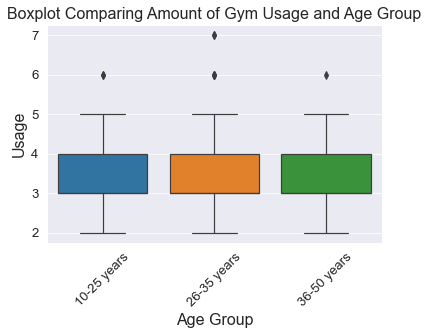

In [70]:
sns.boxplot(x='Age_Group', y='Usage',data=data3)
plt.title('Boxplot Comparing Amount of Gym Usage and Age Group')
plt.xlabel('Age Group') 
plt.xticks(rotation=45)
plt.show()

The p-values are greater than 0.05 (0.05 significance level). So, we accept the null hypothesis that there is no significant 
difference in mean usage for the different age groups. Thus, we have justified that age of a customer has no impact on 
usage of the exercise facility.

Now let's test whether or not the income of customers affect their usage of the exercise facility.

In [71]:
data4=data2[['Income_Group', 'Usage']]
data4.head()

,Income_Group,Usage
0,"Less than £45,000",3
1,"Less than £45,000",2
2,"Less than £45,000",4
3,"Less than £45,000",3
4,"Less than £45,000",4


In [72]:
model4=smf.ols('Usage ~ C(Income_Group)', data=data4).fit()
aov_table4=anova_lm(model4,typ=2)        #typ = 2 means no intercept, and typ=3 means include intercept on the anova table

In [73]:
print(aov_table4)

                     sum_sq     df          F        PR(>F)
C(Income_Group)   49.401801    2.0  27.114784  5.343134e-11
Residual         161.242643  177.0        NaN           NaN


In [74]:
McIncomeGroup4=multi.MultiComparison(data4['Usage'],data4['Income_Group'])
results_IncomeGroup4=McIncomeGroup4.tukeyhsd()

In [75]:
print(results_IncomeGroup4.summary())

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------
Less than £45,000     Over £60,000   1.2619 0.001  0.7875  1.7363   True
Less than £45,000 £45,000 -£60,000   0.0369   0.9 -0.3644  0.4383  False
     Over £60,000 £45,000 -£60,000   -1.225 0.001 -1.6473 -0.8026   True
------------------------------------------------------------------------


In [76]:
data2.groupby(by=['Income_Group'])['Usage'].mean()


Income_Group
Less than £45,000    3.142857
£45,000 -£60,000     3.179775
Over £60,000         4.404762
Name: Usage, dtype: float64

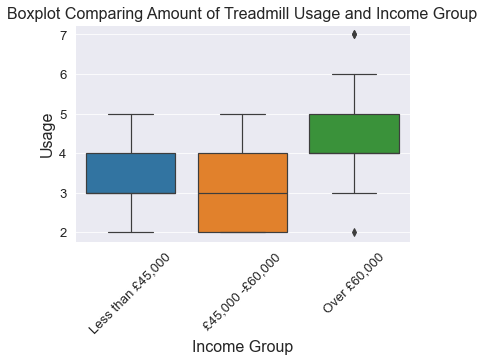

In [77]:
sns.boxplot(x='Income_Group', y='Usage',data=data4)
plt.title('Boxplot Comparing Amount of Treadmill Usage and Income Group')
plt.xlabel('Income Group') 
plt.xticks(rotation=45)
plt.show()

Based on the derived p-values, we accept the null hypothesis that there is no significant difference in mean usage for customers who fall within the income group of 'Less than £45000' and '£45000 - £60000'. However, there is significant difference in the mean usage for customers whose income is over £60,000. Therefore, customers who earn less than £60,000 on the average use the treadmill less than 4 times per week, while those who earn over £60000 use the facility more than 4 times per week.  

In [78]:
data2.groupby(by=['Income_Group'])['Fitness'].mean()


Income_Group
Less than £45,000    2.959184
£45,000 -£60,000     3.168539
Over £60,000         4.023810
Name: Fitness, dtype: float64

The high income earners are more fit.

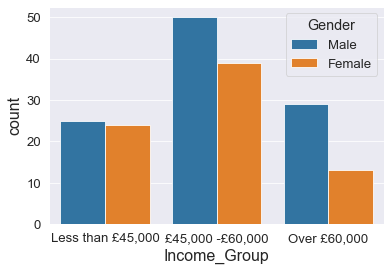

In [79]:
sns.countplot(data2['Income_Group'], hue = data2['Gender'])
plt.show()

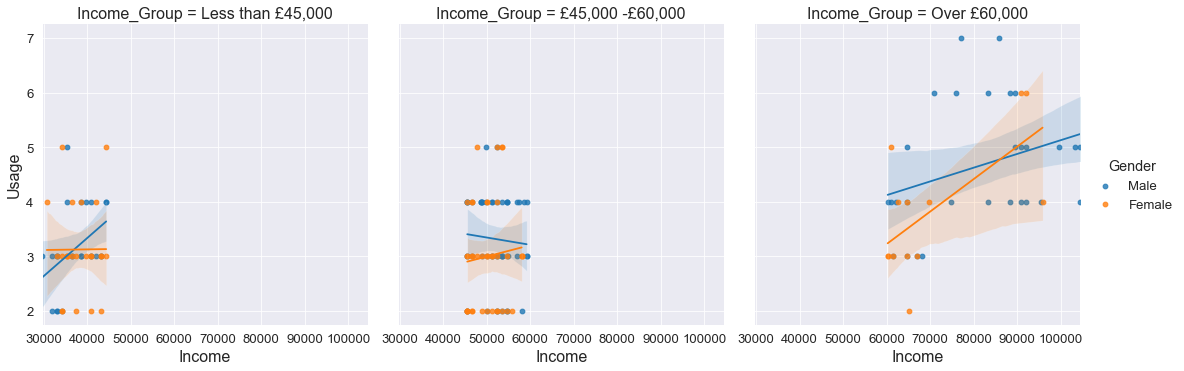

In [80]:
sns.lmplot(x='Income',y='Usage',data=data2,fit_reg=True, hue='Gender',col='Income_Group')


For all income groups male customers' usage per income is higher than (ahead) that of female customers, except for income group less than £45000 where usage of male and female customers are balanced.

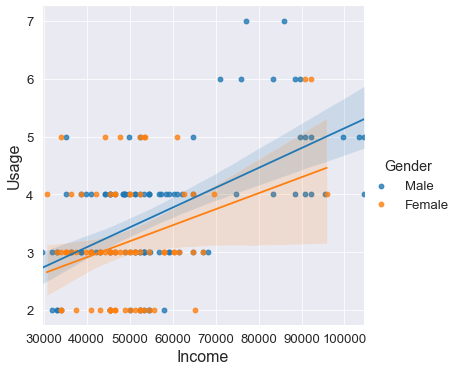

In [81]:
sns.lmplot(x='Income',y='Usage',data=data2,fit_reg=True, hue='Gender')


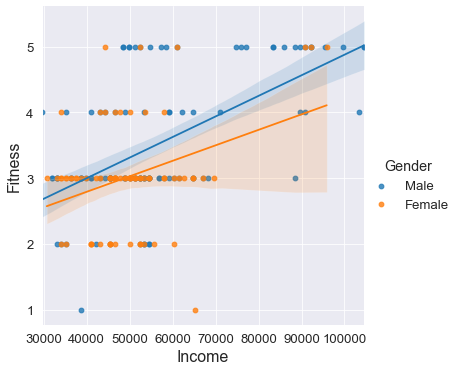

In [82]:
sns.lmplot(x='Income',y='Fitness',data=data2,fit_reg=True, hue='Gender')


Overall, male usage (and fitness) of gym facility per income is higher than that of female users.

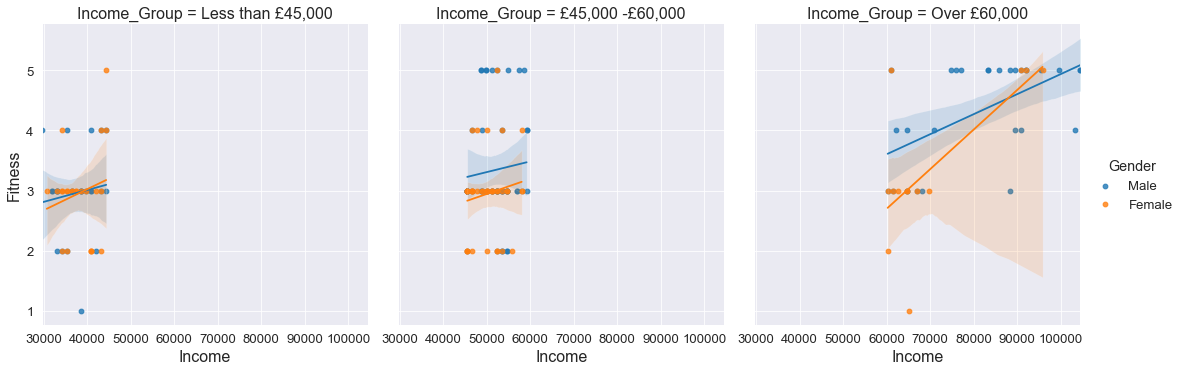

In [83]:
sns.lmplot(x='Income',y='Fitness',data=data2,fit_reg=True, hue='Gender',col='Income_Group')


For all income groups male customers' fitness per income is higher than (ahead) that of female customers.

# Conclusion

Six (6) of the features of the dataset are of integer data type (age, education, usage, fitness, income, and miles), while the remaining three are of object data type (product, gender, and marital status).

No missing data observed in the dataset (or data fields).

Mean age, education, usage, fitness, income, and miles are approximately 29 years, 16 years, 3.5, 3.3, £53720, and 103 miles respectively. Their corresponding median values are 26 years, 16 years, 3, 3, £50600 and 94 miles. The mean education corresponds to the median - showing a possibility of normal distribution. Also, other features may show normal distribution, but to confirm normality, further data visualisation tools were used.

Based on univariate data analysis, none of the numeric features are not normally distributed, majority of them are skewed (distributed) towards the right and full of outliers. Also, majority of the customers use TM195 product and least of TM798 product. Furthermore, most of the customers are male, and most of the customers have at least a partner compared to the single ones.

The heatmap (correlation) shows that, there is no relationship between Age and (Education, Usage, Fitness, or miles).

However, there appears to be a slight positive relationship between Age and Income (0.51).

Furthermore, there is a positive relationship between Income and (Age, Education, Usage, Fitness or Miles)

There is a positive relationship between Fitness and (Usage, Income, or Miles)

There is a positive relationship between Usage and (Fitness, Income, or Miles)

There is a positive relationship between Education and Income (0.63). It appears that the higher the education level the more income a customer gets.

There is a positive relationship between Miles and (Usage, Fitness, or Income)

However, there is a more significant relationship between Miles and (Usage or Fitness). This shows that the higher the miles covered, the more fit a customer is (0.79). Moreover, the more miles covered depends on the amount of usage (0.76). Inferentially, the more usage, the higher a customer's level of finess (0.67).

But, the positive relationship between Income and Usage (or Fitness) is not very significant (0.52-0.54). So, there is a chance that not all income range of customers impact usage (or fitness).

Also, even though there is no relationship between Age and Usage (Fitness), it's possible that some age range might impact usage (or fitness).

Fitness increases with Usage.

Fitness increases with amount of Miles covered.

Miles covered increases with Usage

Generally, income of customers increases with their level of education. However, the trend was not sustained for mean education of 15 and 20 years.

Customers whose period of education is 15 years, use the treadmill 2-3 times per week; while those with higher level of education uses the facility a bit more and increases as education (years) increases. However, the education of customers who use the facility 7 times per week is the same as those who use the facility 4 times per week. Thus, we can't really justify that education impacts usage. So, further analysis was conducted.

Amount of usage increases as income of customers increases. However, customers who use the facility up to 7 times per week 
earn a little bit less than those who use the facility 6 times per week. So, one can not really justify whether income 
significantly impacts usage.

The age of a customer has nothing to do with their usage.

More male customers use the treadmill more. However, this could be as a result of more male customers in the dataset. So, further statistical testing was required to justify the result.

The mean difference between single and partnered customers using the faciltity is negligible. So, usage of the facility is independent on customers' marital status.

People using TM798 product use the exercise facility for almost 5 times per week, whereas other product users use the facility for about 3 times per week on the average. So, although least number of customers use product TM798, but those customers use the treadmill nearly 5 times per week.

Since p-value < 0.05, we reject the null hypothesis. So, there is significant difference between mean usage for male and female.

Therefore, male customers use the treadmill  more than females. This is regardless of the fact that there are more male customers in the dataset. So, we have established that more male customers uses the exercise facility more often, and that marital status of customers does not impact their usage of the facility.

Male customers are more fit than female users.

Mean usage for the different age groups are similar. So, further testing will be needed to justify whether or not the difference in mean usage is significant.

Mean usage for the different income groups are similar, except for income groups over £60,000. So, further testing will be needed to justify whether or not the difference in mean usage is significant.

The p-values are greater than 0.05 (0.05 significance level). So, we accept the null hypothesis that there is no significant difference in mean usage for the different age groups. Thus, we have justified that age of a customer has no impact on usage of the exercise facility.

Based on the derived p-values, we accept the null hypothesis that there is no significant difference in mean usage for customers who fall within the income group of 'Less than £45000' and '£45000 - £60000'. However, there is significant difference in the mean usage for customers whose income is over £60,000. Therefore, customers who earn less than £60,000 on the average use the exercise facility less than 4 times per week, while those who earn over £60000 use the facility more than 4 times per week.

For all income groups male customers' treadmill usage per income is higher than (ahead) that of female customers, except for income group less than £45000 where usage by male and female customers are balanced.

For all income groups male customers' fitness per income is higher than (ahead) that of female customers.

In conclusion, the gender and income of a customer impact the amount of usage of the treadmill.  Male customers use the equipment more than females, and customers who earn over £60,000 use the gym facility more than 4 times per week compared to lower income groups who use the facility less than 4 times per week. 



# Recommendation

It would be a great idea to target income earners below £60,000 as they would most likely form a larger population of customers who are not very fit. The company can create opportunity to provide gym membership at different prices so low-earning customers can access the gym under lower membership cost. There is also a possibility that low earning customers have limited time as majority of them are in the early stage of their career, busy with work. So, the gym company should consider providing home gym for customers with appropriate video, so these customers can watch the video and exercise without the stress of running miles to get to the gym facility. Also, more earning customers should be targeted as they have a higher propensity to use the gym and therefore get fit as a result.



In [84]:
#Installation step 
#!pip install pandas-profiling
#or 
import sys
!{sys.executable} -m pip install pandas-profiling

In [85]:
#import pandas_profiling
import pandas_profiling 

In [86]:
data5=data2.copy()
data5.head()       # Customer profile

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Income_Group
0,TM195,18,Male,14,Single,3,4,29562,112,10-25 years,"Less than £45,000"
1,TM195,19,Male,15,Single,2,3,31836,75,10-25 years,"Less than £45,000"
2,TM195,19,Female,14,Partnered,4,3,30699,66,10-25 years,"Less than £45,000"
3,TM195,19,Male,12,Single,3,3,32973,85,10-25 years,"Less than £45,000"
4,TM195,20,Male,13,Partnered,4,2,35247,47,10-25 years,"Less than £45,000"


In [87]:
#Getting the pandas profiling report 
pandas_profiling.ProfileReport(data5)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
#Getting an html file as output here 
pandas_profiling.ProfileReport(data5).to_file("output_data5.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]